In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [8]:
df_original = pd.read_csv('/Users/diqin/Downloads/Learning/Programming/python/DS-intern/datasets/processed/heart_with_nans.csv')
df_original.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,HighCholesterol,HighBloodPressure,HadHeartAttack,...,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,No,No,Yes,No,...,"White only, Non-Hispanic",Age 80 or older,1.60,78.02,30.47,No,No,No,No,No
1,Alabama,Female,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,Yes,Yes,No,...,"White only, Non-Hispanic",Age 80 or older,1.45,59.87,28.56,No,No,Yes,Yes,No
2,Alabama,Female,Fair,6.0,2.0,Within past year (anytime less than 12 months ...,Yes,Yes,Yes,No,...,"Black only, Non-Hispanic",Age 80 or older,1.63,58.97,22.31,No,No,Yes,Yes,No
3,Alabama,Female,Very good,2.0,0.0,Within past 5 years (2 years but less than 5 y...,Yes,No,No,No,...,"White only, Non-Hispanic",Age 75 to 79,1.68,77.11,27.44,No,Yes,Yes,Yes,No
4,Alabama,Female,Fair,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,No,Yes,No,...,"White only, Non-Hispanic",Age 75 to 79,1.73,77.11,25.85,Yes,No,No,Yes,No


In [17]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      433323 non-null  object 
 1   Sex                        433323 non-null  object 
 2   GeneralHealth              432061 non-null  object 
 3   PhysicalHealthDays         422538 non-null  float64
 4   MentalHealthDays           425215 non-null  float64
 5   LastCheckupTime            424795 non-null  object 
 6   PhysicalActivities         432072 non-null  object 
 7   HighCholesterol            378239 non-null  object 
 8   HighBloodPressure          431404 non-null  object 
 9   HadHeartAttack             430755 non-null  object 
 10  HadAngina                  429092 non-null  object 
 11  HadStroke                  431849 non-null  object 
 12  HadAsthma                  431622 non-null  object 
 13  HadSkinCancer              43

In [9]:
for col in df_original.columns:
    print(f"{col}: {df_original[col].unique()}")

State: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Louisiana' 'Maine'
 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia'
 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico' 'Virgin Islands']
Sex: ['Female' 'Male']
GeneralHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent' nan]
PhysicalHealthDays: [ 0.  6.  2.  8.  1.  5.  4. 30. 15. 21. 10. 25. 14.  7. 20. nan  3. 12.
 26.  9. 24. 18. 13. 28. 23. 16. 17. 11. 29. 27. 22. 19.]
MentalHealthDays: [ 0.  2.  3. nan 10. 25.  5. 30. 20. 15. 12.  4.  1.  6. 21. 14.  7. 29.
  8. 18. 16. 17.  9. 28. 13. 22. 11. 24. 27. 

In [10]:
numerical_df = df_original.select_dtypes(include=['number'])
numerical_df

,PhysicalHealthDays,MentalHealthDays,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,1.60,78.02,30.47
1,0.0,0.0,1.45,59.87,28.56
2,6.0,2.0,1.63,58.97,22.31
3,2.0,0.0,1.68,77.11,27.44
4,0.0,0.0,1.73,77.11,25.85
...,...,...,...,...,...
433318,12.0,30.0,1.93,108.86,29.21
433319,0.0,0.0,1.65,68.04,24.96
433320,10.0,0.0,1.68,96.62,34.38
433321,0.0,0.0,1.63,63.05,23.86


In [11]:
df_original.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1262
PhysicalHealthDays           10785
MentalHealthDays              8108
LastCheckupTime               8528
PhysicalActivities            1251
HighCholesterol              55084
HighBloodPressure             1919
HadHeartAttack                2568
HadAngina                     4231
HadStroke                     1474
HadAsthma                     1701
HadSkinCancer                 2930
HadCOPD                       2066
HadDepressiveDisorder         2587
HadKidneyDisease              1892
HadArthritis                  2560
HadDiabetes                    984
DeafOrHardOfHearing          14792
BlindOrVisionDifficulty      15710
DifficultyConcentrating      18128
DifficultyWalking            17850
DifficultyDressingBathing    17676
DifficultyErrands            19400
SmokerStatus                 23062
ECigaretteUsage              23251
RaceEthnicityCategory         9570
AgeCategory         

In [ ]:
df = df_original.copy()

categorical_cols = df.select_dtypes(include=['object']).columns

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
df[categorical_cols] = df[categorical_cols].astype(str)

In [23]:
cols_to_impute = ['PhysicalHealthDays','MentalHealthDays']
mice_imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)
df[cols_to_impute] = mice_imputer.fit_transform(df[cols_to_impute])


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [34]:
df['BMI'] = df.apply(
    lambda row: round(row['Weight'] / (row['Height'] ** 2), 2) if pd.isnull(row['BMI']) else row['BMI'],
    axis=1
)

In [35]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
HighCholesterol              0
HighBloodPressure            0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholD

In [36]:
df['PhysicalHealthDays'] = df['PhysicalHealthDays'].apply(int)
df['MentalHealthDays'] = df['MentalHealthDays'].apply(int)
numerical_df2 = df.select_dtypes(include=['number'])
numerical_df2

,PhysicalHealthDays,MentalHealthDays,HeightInMeters,WeightInKilograms,BMI
0,0,0,1.60,78.02,30.47
1,0,0,1.45,59.87,28.56
2,6,2,1.63,58.97,22.31
3,2,0,1.68,77.11,27.44
4,0,0,1.73,77.11,25.85
...,...,...,...,...,...
433318,12,30,1.93,108.86,29.21
433319,0,0,1.65,68.04,24.96
433320,10,0,1.68,96.62,34.38
433321,0,0,1.63,63.05,23.86


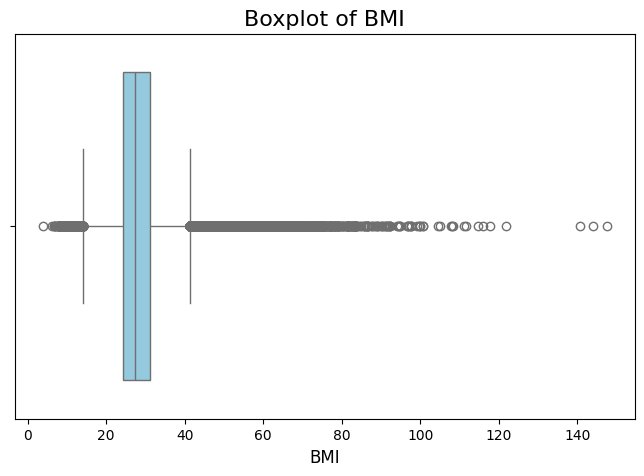

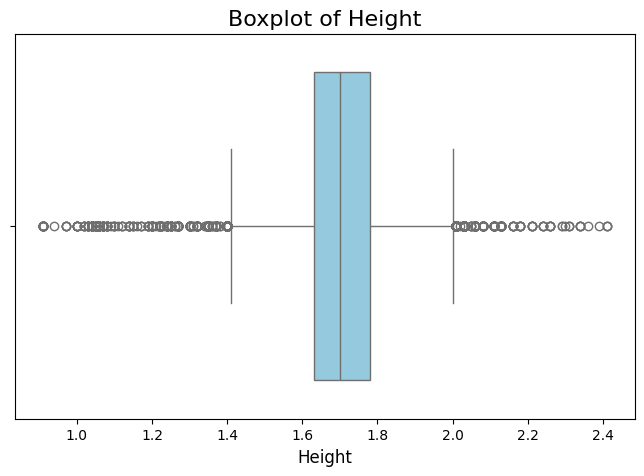

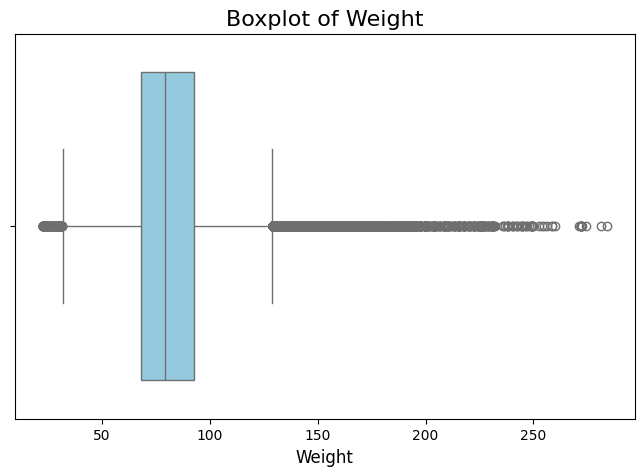

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['BMI'], color='skyblue')
plt.title('Boxplot of BMI', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['HeightInMeters'], color='skyblue')
plt.title('Boxplot of Height', fontsize=16)
plt.xlabel('Height', fontsize=12)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['WeightInKilograms'], color='skyblue')
plt.title('Boxplot of Weight', fontsize=16)
plt.xlabel('Weight', fontsize=12)
plt.show()


In [30]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
outliers.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,HighCholesterol,HighBloodPressure,HadHeartAttack,...,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos
10,Alabama,Male,Good,0,0,Within past year (anytime less than 12 months ...,Yes,Yes,Yes,No,...,"White only, Non-Hispanic",Age 55 to 59,1.80,136.08,41.84,No,No,No,No,Yes
32,Alabama,Female,Good,0,0,Within past year (anytime less than 12 months ...,Yes,Yes,Yes,No,...,"White only, Non-Hispanic",Age 55 to 59,1.68,124.74,44.39,No,No,No,No,Yes
54,Alabama,Female,Fair,5,10,Within past year (anytime less than 12 months ...,No,No,No,No,...,"White only, Non-Hispanic",Age 35 to 39,1.78,163.29,51.65,Yes,Yes,Yes,No,Yes
60,Alabama,Female,Very good,0,0,Within past year (anytime less than 12 months ...,No,No,Yes,No,...,"Black only, Non-Hispanic",Age 75 to 79,1.70,155.58,53.72,No,No,Yes,No,Yes
63,Alabama,Female,Good,1,0,Within past year (anytime less than 12 months ...,Yes,Yes,"Yes, but female told only during pregnancy",No,...,"White only, Non-Hispanic",Age 60 to 64,1.65,131.54,48.26,No,No,Yes,No,No


In [ ]:
df_sorted = df.sort_values(by=['HeightInMeters'], ascending=[True])
df_sorted.head(20)

In [40]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print('Before:', df.shape)
df_clean = remove_outliers_iqr(df, 'BMI')
print('After:', df_clean.shape)


Before: (433323, 37)
After: (415881, 37)


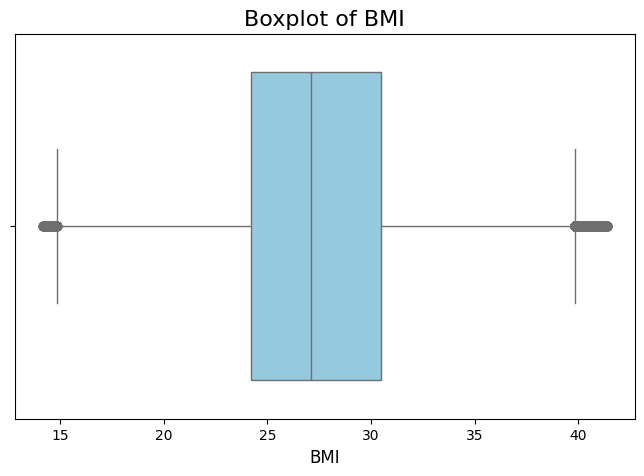

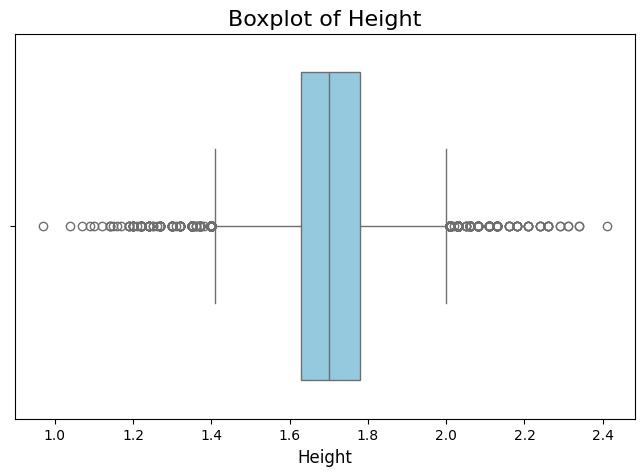

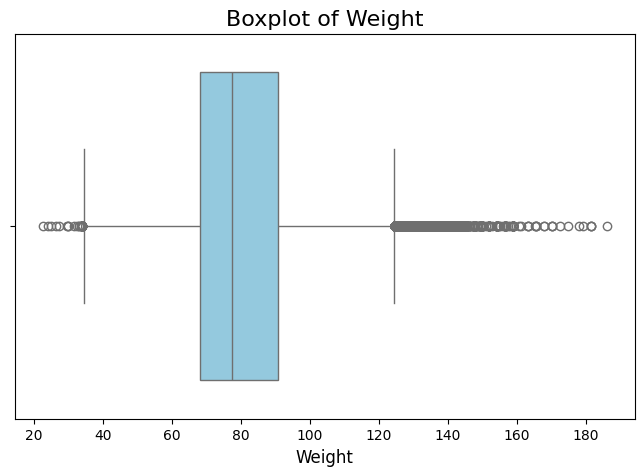

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['BMI'], color='skyblue')
plt.title('Boxplot of BMI', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['HeightInMeters'], color='skyblue')
plt.title('Boxplot of Height', fontsize=16)
plt.xlabel('Height', fontsize=12)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['WeightInKilograms'], color='skyblue')
plt.title('Boxplot of Weight', fontsize=16)
plt.xlabel('Weight', fontsize=12)
plt.show()

In [47]:
# Hitung IQR lagi dari df_clean
Q1 = df_clean['BMI'].quantile(0.25)
Q3 = df_clean['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ambil baris yang outlier BMI di df_clean
outliers = df_clean[(df_clean['BMI'] < lower_bound) | (df_clean['BMI'] > upper_bound)]
outliers.head()


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,HighCholesterol,HighBloodPressure,HadHeartAttack,...,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos
0,Alabama,Female,Very good,0,0,Within past 2 years (1 year but less than 2 ye...,No,No,Yes,No,...,"White only, Non-Hispanic",Age 80 or older,1.60,78.02,30.47,No,No,No,No,No
1,Alabama,Female,Very good,0,0,Within past 2 years (1 year but less than 2 ye...,Yes,Yes,Yes,No,...,"White only, Non-Hispanic",Age 80 or older,1.45,59.87,28.56,No,No,Yes,Yes,No
2,Alabama,Female,Fair,6,2,Within past year (anytime less than 12 months ...,Yes,Yes,Yes,No,...,"Black only, Non-Hispanic",Age 80 or older,1.63,58.97,22.31,No,No,Yes,Yes,No
3,Alabama,Female,Very good,2,0,Within past 5 years (2 years but less than 5 y...,Yes,No,No,No,...,"White only, Non-Hispanic",Age 75 to 79,1.68,77.11,27.44,No,Yes,Yes,Yes,No
4,Alabama,Female,Fair,0,0,Within past year (anytime less than 12 months ...,Yes,No,Yes,No,...,"White only, Non-Hispanic",Age 75 to 79,1.73,77.11,25.85,Yes,No,No,Yes,No


In [51]:
df_sorted_clean = df_clean.sort_values(by=['BMI'], ascending=[True])
df_sorted_clean.head(20)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,HighCholesterol,HighBloodPressure,HadHeartAttack,...,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos
328427,South Carolina,Female,Poor,30,20,Within past year (anytime less than 12 months ...,No,Yes,Yes,Yes,...,"White only, Non-Hispanic",Age 70 to 74,1.60,36.29,14.17,No,No,Yes,Yes,No
54973,Connecticut,Female,Good,2,0,Within past year (anytime less than 12 months ...,No,Yes,Yes,No,...,Hispanic,Age 25 to 29,1.60,36.29,14.17,No,Yes,No,Yes,No
251365,New Jersey,Female,Good,5,30,Within past year (anytime less than 12 months ...,Yes,No,No,No,...,"White only, Non-Hispanic",Age 65 to 69,1.60,36.29,14.17,Yes,Yes,No,No,No
34780,California,Female,Fair,30,0,Within past year (anytime less than 12 months ...,No,No,Yes,No,...,"White only, Non-Hispanic",Age 75 to 79,1.55,34.02,14.17,No,Yes,Yes,Yes,No
390896,Washington,Female,Fair,0,2,Within past year (anytime less than 12 months ...,Yes,No,Yes,Yes,...,Hispanic,Age 65 to 69,1.60,36.29,14.17,No,No,Yes,Yes,No
19611,Arizona,Female,Good,2,0,Within past year (anytime less than 12 months ...,Yes,Yes,No,No,...,Hispanic,Age 45 to 49,1.55,34.02,14.17,No,No,No,No,No
173391,Massachusetts,Female,Good,0,0,Within past year (anytime less than 12 months ...,No,Yes,Yes,No,...,Hispanic,Age 75 to 79,1.60,36.29,14.17,Yes,No,No,No,Yes
332958,South Dakota,Female,Very good,0,15,Within past year (anytime less than 12 months ...,No,No,No,No,...,"White only, Non-Hispanic",Age 75 to 79,1.55,34.02,14.17,Yes,No,No,Yes,Yes
177983,Massachusetts,Female,Good,0,0,Within past year (anytime less than 12 months ...,Yes,No,Yes,No,...,Hispanic,Age 70 to 74,1.60,36.29,14.17,No,Yes,Yes,Yes,No
318852,Rhode Island,Female,Fair,30,1,Within past year (anytime less than 12 months ...,No,No,Yes,Yes,...,"White only, Non-Hispanic",Age 65 to 69,1.68,39.92,14.20,Yes,Yes,No,Yes,Yes


In [53]:
df_clean.to_csv('../datasets/processed/heart_no_outliers.csv', index=False)